# SALES ANALYSIS 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None #Ignores Pandas Warnings

In [2]:
all_months_data = pd.DataFrame()

## Merging 12 months of data

In [3]:
sales_files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]
for file in sales_files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("All months data.csv",index = False)

##Read updated dataframe

In [4]:
all_data = pd.read_csv("All months data.csv")

## Data cleanup

### Remove nan

In [5]:
all_data = all_data.dropna(how = 'all')

### Finding 'Or' in Order Date column and deleting it

In [6]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']#gives the dataframe of the values containing or

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## 1.Best month for sales and money earned that month

### Making a months column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Making Total column

In [9]:
all_data['Total'] = all_data['Price Each'].astype('float') * all_data['Quantity Ordered'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Making a seperate table with monthly sales

In [10]:
monthly_sales = all_data.groupby('Month').sum()
monthly_sales

,Total
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


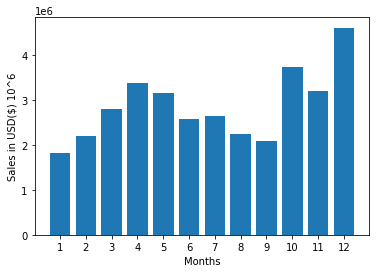

In [11]:
plt.bar(monthly_sales.index,monthly_sales['Total'])
plt.xticks(monthly_sales.index)
plt.xlabel("Months")
plt.ylabel("Sales in USD($) 10^6")
plt.show()

## 2.Which city had the most Sales?

### Making a city column

In [12]:
#Using .apply() method
#This method allows us to apply any arbitary function on a column
def get_city(address):
    return address.split(',')[1]

def get_code(address):
    return address.split(',')[2].split()[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_code(x)})")

In [80]:
city_data = all_data.groupby('City')['Total'].sum()
city_data

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Total, dtype: float64

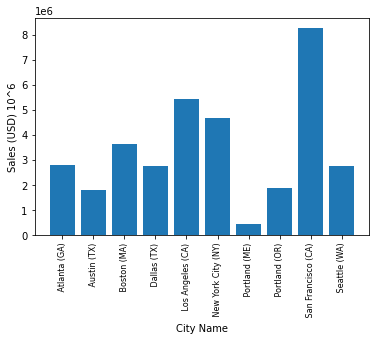

In [14]:
plt.bar(city_data.index,city_data['Total'])
plt.xticks(city_data.index,rotation = 'vertical',size = 8)
plt.ylabel('Sales (USD) 10^6')
plt.xlabel('City Name')
plt.show()

## 3.Best time for advertisements

In [15]:
#making a Date-Time object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

### Creating an hour and minute column

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [81]:
vari = all_data.groupby('Hour')['Quantity Ordered'].count()
vari

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

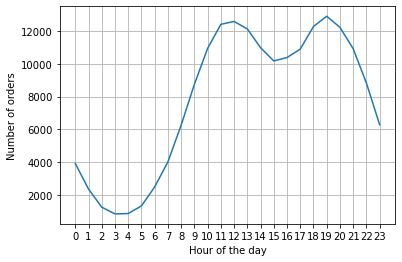

In [18]:
#hours = [hour for hour,df in all_data.groupby('Hour')] This is just anther method.
plt.plot(vari.index,vari['Quantity Ordered'])
plt.xticks(vari.index)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

## 4.What products are most often bought together?

### Since we are considering only those order id's with more than 1 item,we form a new DataFrame

In [25]:
bought_together = all_data[all_data['Order ID'].duplicated(keep = False)]
bought_together['Group'] = bought_together.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
final_paired_data = bought_together[['Order ID','Group']].drop_duplicates()
final_paired_data.head(10)

,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


### This gives us the top 10 most commonly sold item pairs:

In [63]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in final_paired_data['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### This gives us the 10 most commonly sold item in pairs of three:

In [64]:
count2 = Counter()
for row in final_paired_data['Group']:
    row_list = row.split(',')
    count2.update(Counter(combinations(row_list,3)))
count2.most_common(10)
for key,value in count2.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


## 5.What product sold the most?Why?

In [77]:
top_products = pd.DataFrame()
top_products['Count'] = 1
top_products['Count'] = all_data.groupby('Product')['Quantity Ordered'].count()
top_products.head(10)

,Count
Product,
20in Monitor,4101
27in 4K Gaming Monitor,6230
27in FHD Monitor,7507
34in Ultrawide Monitor,6181
AA Batteries (4-pack),20577
AAA Batteries (4-pack),20641
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
Flatscreen TV,4800


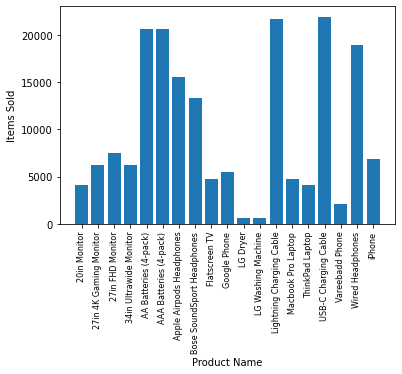

In [78]:
plt.bar(top_products.index,top_products['Count'])
plt.xticks(top_products.index,rotation = 'vertical',size = 8)
plt.ylabel('Items Sold')
plt.xlabel('Product Name')
plt.show()